# 서울시에서 아이 키우기 가장 좋은 자치구

In [1]:
import mysql.connector
import pandas as pd

In [7]:
conn = mysql.connector.connect(
    host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'team2',
    password = "1234",
    database = 'eda_project' 
)

cur = conn.cursor(buffered=True)

In [6]:
conn.close()

### 구 정보 불러오기

In [10]:
cur.execute('SELECT gu_name, gu_id, total_population, child_population, student_population FROM gu')
gu_info = cur.fetchall()

gu_name = []
gu_id = []
total = []
child = []
student = []

for info in enumerate(gu_info):
    gu_name.append(info[1][0])
    gu_id.append(info[1][1])
    total.append(int(round((info[1][2]),0)))
    child.append(int(round((info[1][3]),0)))
    student.append(int(round((info[1][4]),0)))


gu = pd.DataFrame({'구 이름':gu_name,
                     '구 id':gu_id,
                     '총 인구':total,
                     '유아 인구':child,
                     '학생 인구':student})
gu.head()

,구 이름,구 id,총 인구,유아 인구,학생 인구
0,종로구,1,204215,25403,16912
1,중구,2,171223,15794,8772
2,용산구,3,239021,30679,16773
3,성동구,4,328018,47985,25381
4,광진구,5,363467,54690,32467


In [11]:
gu_sort = gu.set_index('구 id')
gu_sort

,구 이름,총 인구,유아 인구,학생 인구
구 id,,,,
1,종로구,204215,25403,16912
2,중구,171223,15794,8772
3,용산구,239021,30679,16773
4,성동구,328018,47985,25381
5,광진구,363467,54690,32467
6,동대문구,351403,50306,29926
7,중랑구,358630,49668,25775
8,성북구,446463,80945,49061
9,강북구,283188,38676,21953


### 학교, 학원, 독서실, 도서관 정보 불러오기

#### 학교 정보

In [12]:
cur.execute('SELECT gu_id,school_type, school_count FROM school')
school_info = cur.fetchall()

gu_id = []
school_type = []
school_count = []

for info in enumerate(school_info):
    gu_id.append(info[1][0])
    school_type.append(info[1][1])
    school_count.append(int(info[1][2]))

school = pd.DataFrame({'구 id':gu_id,
                       '학교 유형':school_type,
                       '학교 수':school_count})
school_sort = pd.pivot_table(data=school,index='구 id', values='학교 수',aggfunc='sum')
school_sort

,학교 수
구 id,
1,118
2,109
3,141
4,208
5,192
6,248
7,243
8,281
9,157


#### 학원 정보

In [13]:
cur.execute('SELECT gu_id,academy_type, academy_count FROM academy')
academy_info = cur.fetchall()

gu_id = []
academy_type = []
academy_count = []

for info in enumerate(academy_info):
    gu_id.append(info[1][0])
    academy_type.append(info[1][1])
    academy_count.append(int(info[1][2]))

academy = pd.DataFrame({'구 id':gu_id,
                       '학원 유형':academy_type,
                       '학원 수':academy_count})


academy_sort = pd.pivot_table(data=academy,index='구 id', values='학원 수', aggfunc='sum')
academy_sort

,학원 수
구 id,
1,82
2,53
3,93
4,223
5,338
6,326
7,229
8,414
9,188


#### 도서관 정보

In [14]:
cur.execute("SELECT gu_id, space_count FROM learning_space where space_type = '도서관'")
library_info = cur.fetchall()

gu_id = []
library_count = []

for info in enumerate(library_info):
    gu_id.append(info[1][0])
    library_count.append(int(info[1][1]))

library = pd.DataFrame({'구 id':gu_id,
                       '도서관 수':library_count})
library_sort = library.set_index('구 id')
library_sort.sort_index()

,도서관 수
구 id,
1,41
2,38
3,20
4,10
5,13
6,18
7,8
8,25
9,11


#### 합치기

In [15]:
total = pd.concat([gu_sort, school_sort, academy_sort, library_sort], axis=1)
total.head()

,구 이름,총 인구,유아 인구,학생 인구,학교 수,학원 수,도서관 수
구 id,,,,,,,
1,종로구,204215,25403,16912,118,82,41
2,중구,171223,15794,8772,109,53,38
3,용산구,239021,30679,16773,141,93,20
4,성동구,328018,47985,25381,208,223,10
5,광진구,363467,54690,32467,192,338,13


In [16]:
per_s = []
per_a = []
per_l = []

for gu in total.index:
    per_s.append(total.loc[gu]['학생 인구']/total.loc[gu]['학교 수'])

for gu in total.index:
    per_a.append(total.loc[gu]['학생 인구']/total.loc[gu]['학원 수'])

for gu in total.index:
    per_l.append(total.loc[gu]['학생 인구']/total.loc[gu]['도서관 수'])

total['학교당 학생 수'] = per_s
total['학원당 학생 수'] = per_a
total['도서관당 학생 수'] = per_l

total.head()

,구 이름,총 인구,유아 인구,학생 인구,학교 수,학원 수,도서관 수,학교당 학생 수,학원당 학생 수,도서관당 학생 수
구 id,,,,,,,,,,
1,종로구,204215,25403,16912,118,82,41,143.322034,206.243902,412.487805
2,중구,171223,15794,8772,109,53,38,80.477064,165.509434,230.842105
3,용산구,239021,30679,16773,141,93,20,118.957447,180.354839,838.650000
4,성동구,328018,47985,25381,208,223,10,122.024038,113.816143,2538.100000
5,광진구,363467,54690,32467,192,338,13,169.098958,96.056213,2497.461538


In [17]:
total['학교순위'] = total['학교당 학생 수'].rank(ascending=False)
total['학원순위'] = total['학원당 학생 수'].rank(ascending=False)
total['도서관순위'] = total['도서관당 학생 수'].rank(ascending=False)

In [18]:
total

,구 이름,총 인구,유아 인구,학생 인구,학교 수,학원 수,도서관 수,학교당 학생 수,학원당 학생 수,도서관당 학생 수,학교순위,학원순위,도서관순위
구 id,,,,,,,,,,,,,
1,종로구,204215,25403,16912,118,82,41,143.322034,206.243902,412.487805,10.0,1.0,24.0
2,중구,171223,15794,8772,109,53,38,80.477064,165.509434,230.842105,24.0,3.0,25.0
3,용산구,239021,30679,16773,141,93,20,118.957447,180.354839,838.650000,18.0,2.0,23.0
4,성동구,328018,47985,25381,208,223,10,122.024038,113.816143,2538.100000,16.0,6.0,9.0
5,광진구,363467,54690,32467,192,338,13,169.098958,96.056213,2497.461538,6.0,11.0,10.0
6,동대문구,351403,50306,29926,248,326,18,120.669355,91.797546,1662.555556,17.0,13.0,19.0
7,중랑구,358630,49668,25775,243,229,8,106.069959,112.554585,3221.875000,21.0,7.0,4.0
8,성북구,446463,80945,49061,281,414,25,174.594306,118.504831,1962.440000,3.0,4.0,16.0
9,강북구,283188,38676,21953,157,188,11,139.828025,116.771277,1995.727273,11.0,5.0,15.0


In [19]:
rank = total[['구 이름','학교순위','학원순위','도서관순위']]
rank

,구 이름,학교순위,학원순위,도서관순위
구 id,,,,
1,종로구,10.0,1.0,24.0
2,중구,24.0,3.0,25.0
3,용산구,18.0,2.0,23.0
4,성동구,16.0,6.0,9.0
5,광진구,6.0,11.0,10.0
6,동대문구,17.0,13.0,19.0
7,중랑구,21.0,7.0,4.0
8,성북구,3.0,4.0,16.0
9,강북구,11.0,5.0,15.0


In [20]:
rank['평균순위'] = rank[['학교순위', '학원순위', '도서관순위']].mean(axis=1).round(2)
rank.head()

/tmp/ipykernel_3131/3824457907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank['평균순위'] = rank[['학교순위', '학원순위', '도서관순위']].mean(axis=1).round(2)


,구 이름,학교순위,학원순위,도서관순위,평균순위
구 id,,,,,
1,종로구,10.0,1.0,24.0,11.67
2,중구,24.0,3.0,25.0,17.33
3,용산구,18.0,2.0,23.0,14.33
4,성동구,16.0,6.0,9.0,10.33
5,광진구,6.0,11.0,10.0,9.00


In [29]:
rank.loc[gu]

구 이름       종로구
학교순위      10.0
학원순위       1.0
도서관순위     24.0
평균순위     11.67
Name: 1, dtype: object

In [31]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'team2',
    password = "1234",
    database = 'eda_project' 
)

cur = conn.cursor(buffered=True)

for gu in  rank.index:
     # 구 ID 가져오기
    cur.execute('SELECT gu_id FROM gu WHERE gu_name = %s', (rank.loc[gu]['구 이름'],))
    gu_id = cur.fetchone()[0]

    input = (gu_id, rank.loc[gu]['학교순위'], rank.loc[gu]['학원순위'], rank.loc[gu]['도서관순위'])

    cur.execute(
            'INSERT INTO rank_for_gu (gu_id, rank_school, rank_academy, rank_library) '
            'VALUES (%s, %s, %s, %s)', 
            input)

    conn.commit()

### 병원 정보 불러오기

#### 소아과 정보

In [32]:
cur.execute("SELECT gu_id,hospital_name, hospital_address FROM hospital where hospital_name like '%소아%'")
pediatrics_info = cur.fetchall()

gu_id = []
pediatrics_name = []
pediatrics_address = []

for info in enumerate(pediatrics_info):
    gu_id.append(info[1][0])
    pediatrics_name.append(info[1][1])
    pediatrics_address.append(info[1][2])

pediatrics = pd.DataFrame({'구 id':gu_id,
                       '소아과 이름':pediatrics_name,
                       '소아과 수':pediatrics_address})
pediatrics.head()

,구 id,소아과 이름,소아과 수
0,23,고만성소아과의원,서울특별시 강남구 개포로 61
1,23,삼성키즈소아청소년과의원,서울특별시 강남구 선릉로 26
2,23,송영명소아과의원,서울특별시 강남구 선릉로10길
3,23,연세도우리소아청소년과의원,서울특별시 강남구 삼성로 14
4,23,연세바다소아청소년과의원,서울특별시 강남구 언주로7길


In [34]:
pediatrics

,구 id,소아과 이름,소아과 수
0,23,고만성소아과의원,서울특별시 강남구 개포로 61
1,23,삼성키즈소아청소년과의원,서울특별시 강남구 선릉로 26
2,23,송영명소아과의원,서울특별시 강남구 선릉로10길
3,23,연세도우리소아청소년과의원,서울특별시 강남구 삼성로 14
4,23,연세바다소아청소년과의원,서울특별시 강남구 언주로7길
...,...,...,...
487,7,신필진소아청소년과의원,서울특별시 중랑구 신내로 21
488,7,양수연소아청소년과의원,서울특별시 중랑구 봉화산로 2
489,7,현엠앤엠소아청소년과의원,서울특별시 중랑구 신내로 82
490,7,왕소아과의원,서울특별시 중랑구 중랑역로 5


#### 전체 병원 정보

In [63]:
cur.execute("SELECT gu_id, hospital_type, hospital_address FROM hospital")
hospital_info = cur.fetchall()

gu_id = []
hospital_type = []
hospital_address = []

for info in enumerate(hospital_info):
    gu_id.append(info[1][0])
    hospital_type.append(info[1][1])
    hospital_address.append(info[1][2])

hospital = pd.DataFrame({'구 id':gu_id,
                       '병원 유형':hospital_type,
                       '병원 수':hospital_address})
hospital.head()

,구 id,병원 유형,병원 수
0,23,요양병원,서울특별시 강남구 논현로2길
1,23,의원,서울특별시 강남구 개포로 61
2,23,의원,서울특별시 강남구 개포로 22
3,23,의원,서울특별시 강남구 개포로 50
4,23,의원,서울특별시 강남구 개포로 62


In [64]:
len(hospital)

19277

In [65]:
hos_sort = hospital.set_index('구 id')
hos_sort = pd.pivot_table(data=hospital, index=hos_sort.index, values='병원 수', aggfunc='count')
hos_sort

,병원 수
구 id,
1,478
2,604
3,325
4,485
5,592
6,628
7,569
8,562
9,479


In [40]:
pediatrics_sort = pediatrics.set_index('구 id')
pediatrics_sort = pd.pivot_table(data=pediatrics, index=pediatrics_sort.index, values='소아과 수', aggfunc='count')
pediatrics_sort

,소아과 수
구 id,
1,4
2,5
3,9
4,21
5,17
6,16
7,17
8,18
9,9


In [41]:
ped_gu = pd.concat([gu_sort,pediatrics_sort],axis=1)
ped_gu

,구 이름,총 인구,유아 인구,학생 인구,소아과 수
구 id,,,,,
1,종로구,204215,25403,16912,4
2,중구,171223,15794,8772,5
3,용산구,239021,30679,16773,9
4,성동구,328018,47985,25381,21
5,광진구,363467,54690,32467,17
6,동대문구,351403,50306,29926,16
7,중랑구,358630,49668,25775,17
8,성북구,446463,80945,49061,18
9,강북구,283188,38676,21953,9


In [45]:
baby = []

for gu in ped_gu.index:
    baby.append(ped_gu.loc[gu]['유아 인구']-ped_gu.loc[gu]['학생 인구'])

ped_gu['어린이'] = baby

In [47]:
ped_gu

,구 이름,총 인구,유아 인구,학생 인구,소아과 수,어린이
구 id,,,,,,
1,종로구,204215,25403,16912,4,8491
2,중구,171223,15794,8772,5,7022
3,용산구,239021,30679,16773,9,13906
4,성동구,328018,47985,25381,21,22604
5,광진구,363467,54690,32467,17,22223
6,동대문구,351403,50306,29926,16,20380
7,중랑구,358630,49668,25775,17,23893
8,성북구,446463,80945,49061,18,31884
9,강북구,283188,38676,21953,9,16723


In [69]:
p_b = []

for gu in ped_gu.index:
    p_b.append(1/(ped_gu.loc[gu]['어린이']/ped_gu.loc[gu]['소아과 수']))

ped_gu['어린이/소아과'] = p_b

In [70]:
ped_gu

,구 이름,총 인구,유아 인구,학생 인구,소아과 수,어린이,어린이/소아과
구 id,,,,,,,
21,관악구,498135,53002,31626,21,21376,0.000982
4,성동구,328018,47985,25381,21,22604,0.000929
19,영등포구,418302,52127,26051,23,26076,0.000882
14,마포구,404715,58398,33252,22,25146,0.000875
18,금천구,203240,23745,12313,10,11432,0.000875
6,동대문구,351403,50306,29926,16,20380,0.000785
5,광진구,363467,54690,32467,17,22223,0.000765
11,노원구,495859,91638,57337,26,34301,0.000758
15,양천구,382655,81302,48121,25,33181,0.000753


<Axes: xlabel='구 이름'>

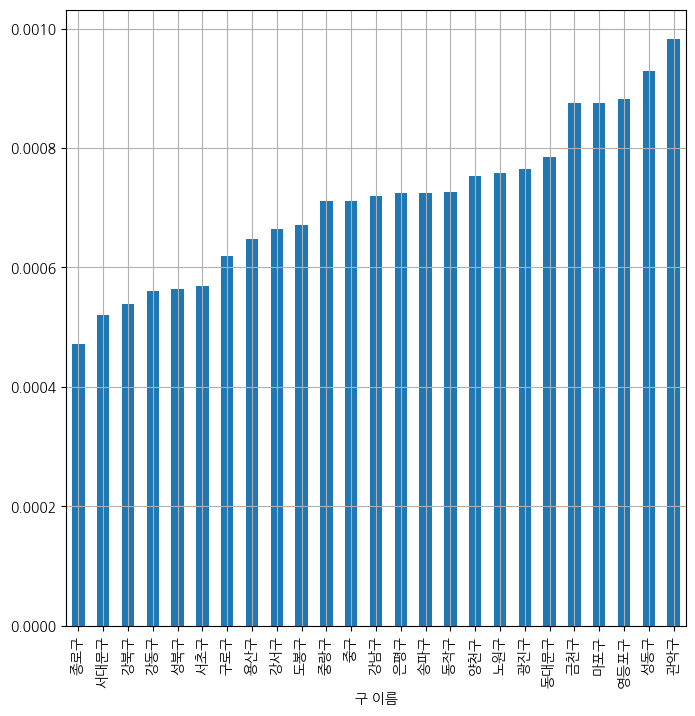

In [75]:
import koreanize_matplotlib

ped_gu_sort= ped_gu.sort_values('어린이/소아과')
ped_gu_sort = ped_gu_sort.set_index('구 이름')
ped_gu_sort['어린이/소아과'].plot(kind='bar', grid=True, figsize=(8,8))

<Axes: xlabel='구 이름'>

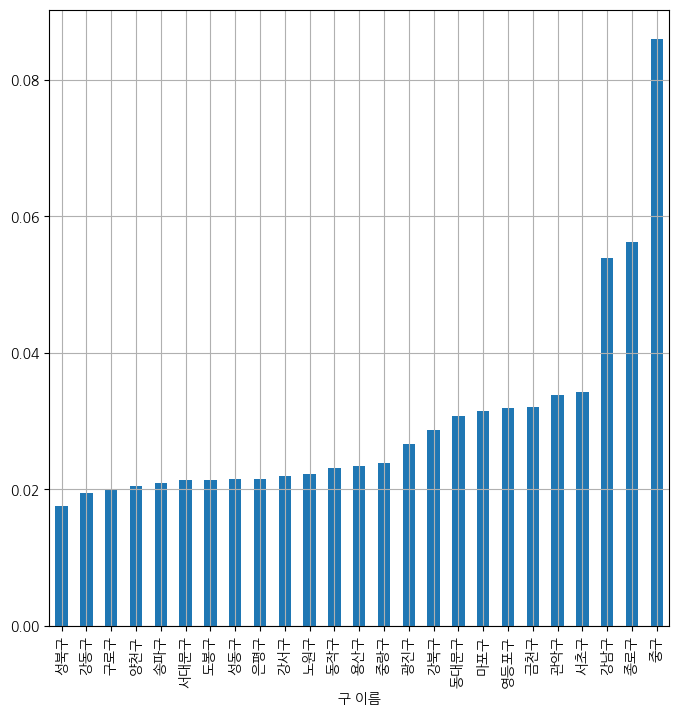

In [74]:
hos_gu = pd.concat([gu_sort,hos_sort],axis=1)
hos_gu

baby = []

for gu in hos_gu.index:
    baby.append(hos_gu.loc[gu]['유아 인구']-hos_gu.loc[gu]['학생 인구'])

hos_gu['어린이'] = baby

p_b = []

for gu in hos_gu.index:
    p_b.append(1/(hos_gu.loc[gu]['어린이']/hos_gu.loc[gu]['병원 수']))

hos_gu['어린이/병원'] = p_b

import koreanize_matplotlib

hos_gu_sort= hos_gu.sort_values('어린이/병원')
hos_gu_sort = hos_gu_sort.set_index('구 이름')
hos_gu_sort['어린이/병원'].plot(kind='bar', grid=True, figsize=(8,8))

In [53]:
conn.commit()

In [67]:
conn.close()